<a href="https://colab.research.google.com/github/LasyaDevulapalli/11239A022_DST_Lab/blob/main/11239A022_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving netflix_titles.csv.zip to netflix_titles.csv.zip
(8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 20

<ipython-input-1-2adab8c162b4>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Not Rated', inplace=True)
<ipython-input-1-2adab8c162b4>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


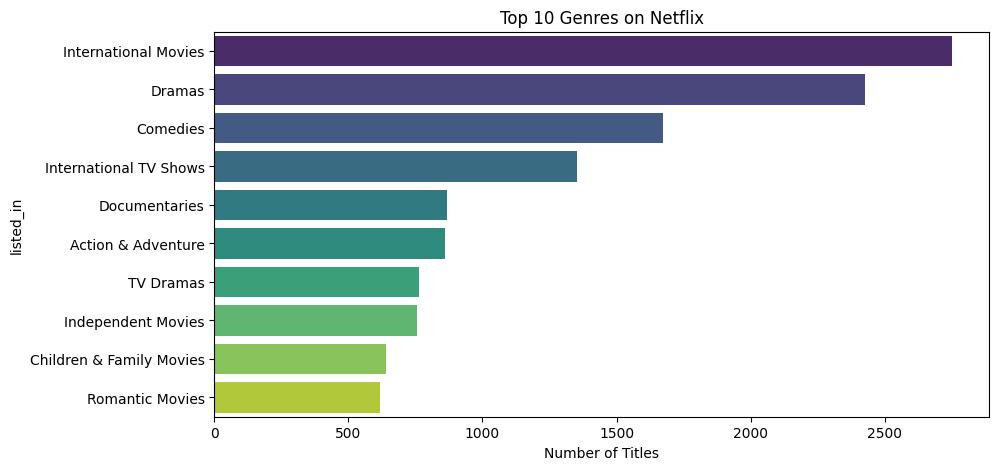

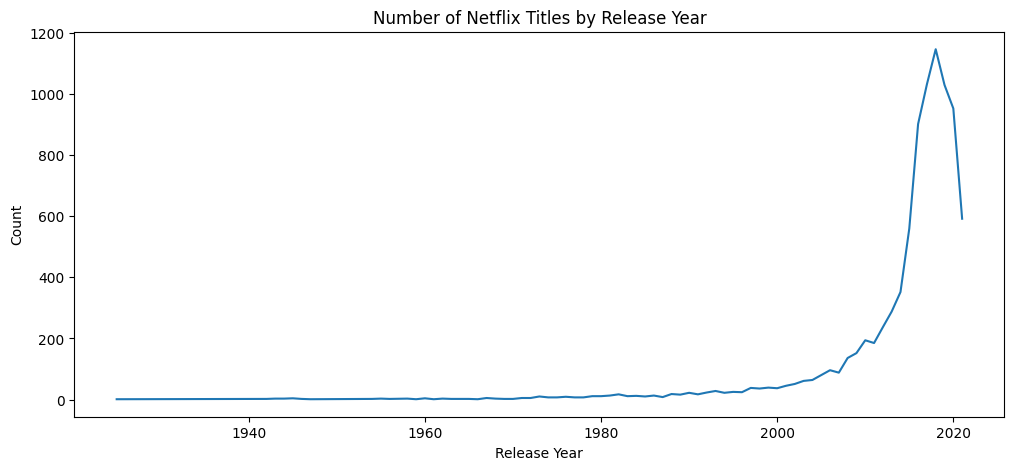

<ipython-input-1-2adab8c162b4>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_count.index, y=rating_count.values, palette='magma')


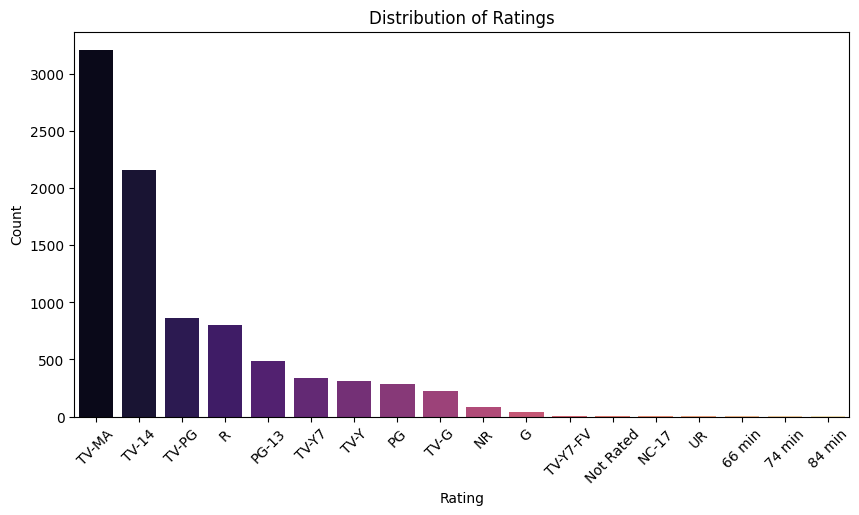

<ipython-input-1-2adab8c162b4>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_count.index, y=type_count.values, palette='Set2')


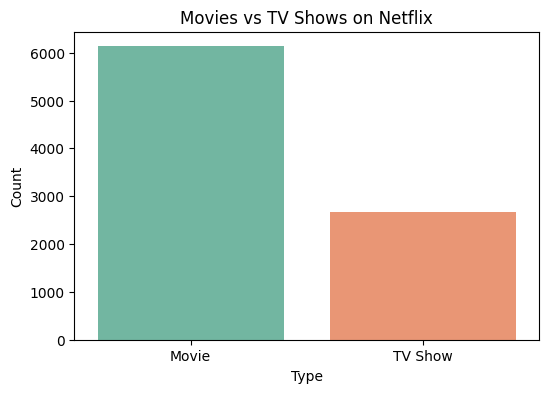

In [1]:
# Install required libraries
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Netflix dataset
from google.colab import files
import zipfile  # Import zipfile for extraction
uploaded = files.upload()  # upload 'netflix_titles.csv (1).zip'

# Extract the uploaded zip file
with zipfile.ZipFile(next(iter(uploaded)), 'r') as zip_ref:
  zip_ref.extractall('.')  # Extract to the current directory

# Read CSV file, assuming 'netflix_titles.csv' is now extracted
df = pd.read_csv('netflix_titles.csv')

# Display basic info
print(df.shape)
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing 'rating' and 'date_added' if needed
df['rating'].fillna('Not Rated', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# ================================
# 1️⃣ Most common genres
# ================================
# Split genres if multiple
df['listed_in'] = df['listed_in'].str.split(', ')
all_genres = df.explode('listed_in')
top_genres = all_genres['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()

# ================================
# 2️⃣ Number of shows per release year
# ================================
year_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=year_count.index, y=year_count.values)
plt.title('Number of Netflix Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# ================================
# 3️⃣ Distribution of ratings
# ================================
rating_count = df['rating'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=rating_count.index, y=rating_count.values, palette='magma')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# ================================
# BONUS: Type distribution (Movie vs TV Show)
# ================================
type_count = df['type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=type_count.index, y=type_count.values, palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()